In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
df = pd.read_csv('youtuber.csv', encoding='utf-8')
df.sample(10)

,인덱스,장르,유튜버아이디,구독자 수,유튜브링크,인스타 링크,인스타 링크 2,인스타 링크3
164,165,패션,Susan 조수잔,18만,UC9edwufjEirbl9-2vns43VQ,https://www.instagram.com/susansan0414/,NaN,NaN
21,22,코믹,quaddurup,67만,UCkQCwnkQfgSuPTTnw_Y7v7w,https://www.instagram.com/real_quaddurup/,NaN,NaN
200,201,스포츠,Moona workout for health,11만,UCMA_DTVCzlALpD8hfGmYAlg,https://www.instagram.com/xxdmsdudxx/,NaN,NaN
159,160,패션,itsjinakim,26만,UCDMLdKoalJdyqKto6KahNGg,https://www.instagram.com/itsjinakim/,NaN,NaN
77,78,푸드,민경장군,10만,UCuLHDMXUqV5JR8Qv-FpwF8g,https://www.instagram.com/gagkimminkyoung/,NaN,NaN
144,145,크리에이티브,다다리빙 DADA Living,21만,UC4ZOrJ0xNrUsVdX64M8atHQ,https://www.instagram.com/dada_living/,NaN,NaN
194,195,스포츠,제이제이살롱드핏,50만,UCUsfRCHj5U1wAJEJiQpPLPw,https://www.instagram.com/jjeuneu/,NaN,NaN
188,189,스포츠,조제알통,18만,UCUfqoN5sUGAVXcmEe3CHKEQ,https://www.instagram.com/jojae____altong/,NaN,NaN
14,15,브이로그,창이의일상,33만,UCZ9vdyLmGse1LRHEY1HNYig,https://www.instagram.com/bbc0526/,NaN,NaN
35,36,토크,거의 한국인 / Almost Koreans,12만,UCm-4I6ACQ9qFj-M_8xynf5g,https://www.instagram.com/mjangarax/,NaN,NaN


In [3]:
df = pd.read_csv('youtuber_final.csv', encoding='utf-8')
df.sample(10)

,Unnamed: 0,youtuber,subscriberCount,videoCount,likeCount,dislikeCount,viewCount,commentCount,recentFrequency,idcount,cmt_with_lim,cluster
164,164,이지쌤,70029,30,5530,38,200804,671,1.00,385,643,1
5,5,BellaLucas벨라앤루카스,338333,35,272446,1371,5757914,11750,1.50,2715,3365,1
65,65,asmr_soupe,385859,22,61869,445,2376767,8580,0.83,1545,1848,1
175,175,조제알통,190813,134,121864,4382,10867445,48406,5.00,7440,13031,0
108,108,리뷰엉이_Owls_Review,460786,46,144697,10512,15474483,76282,1.83,3869,4517,3
125,125,사나이김기훈,841365,151,938309,33205,96413680,106191,5.83,10360,14485,2
49,49,SOPHIE_BAN,184355,93,49468,900,1594941,7030,6.50,1804,6378,0
141,141,악어의사생활,333901,1,4090,66,198327,1181,0.00,89,99,1
37,37,Minjeong_Park,251631,29,44913,903,2236258,4694,1.17,1729,2653,1
56,56,Summer_Park,156625,22,8616,192,402517,1233,0.67,531,971,1


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(4)

,youtuber,subscriberCount,videoCount,likeCount,dislikeCount,viewCount,commentCount,recentFrequency,idcount,cmt_with_lim,cluster
0,72초TV,202135,38,54539,223,1305421,4733,1.0,1469,2360,1
1,9bul,396293,35,198301,5998,16070953,48705,1.5,2615,3465,3
2,AUTOSONICS오토소닉스,72889,83,63700,3145,5211301,18325,4.0,2658,7882,0
3,April_ASMR,433502,7,12245,600,406851,2160,0.0,554,693,1


Slope: 31.255
Intercept: 12272.814


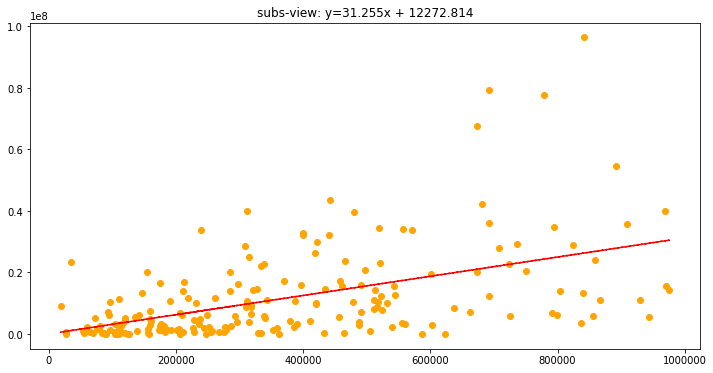

In [31]:
ax = df['subscriberCount']
ay = df['viewCount']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

z = np.polyfit(ax, ay, 1)
p = np.poly1d(z)
plt.plot(ax,p(ax),"r--")

plt.title('subs-view: y={0:.3f}x + {1:.3f}'.format(z[0], z[1]))
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

In [6]:
df['id_con'] = df['idcount'] / df['cmt_with_lim']
df.head(3)

,youtuber,subscriberCount,videoCount,likeCount,dislikeCount,viewCount,commentCount,recentFrequency,idcount,cmt_with_lim,cluster,id_con
0,72초TV,202135,38,54539,223,1305421,4733,1.0,1469,2360,1,0.622458
1,9bul,396293,35,198301,5998,16070953,48705,1.5,2615,3465,3,0.754690
2,AUTOSONICS오토소닉스,72889,83,63700,3145,5211301,18325,4.0,2658,7882,0,0.337224


Text(0.5, 1.0, 'subs-idcon')

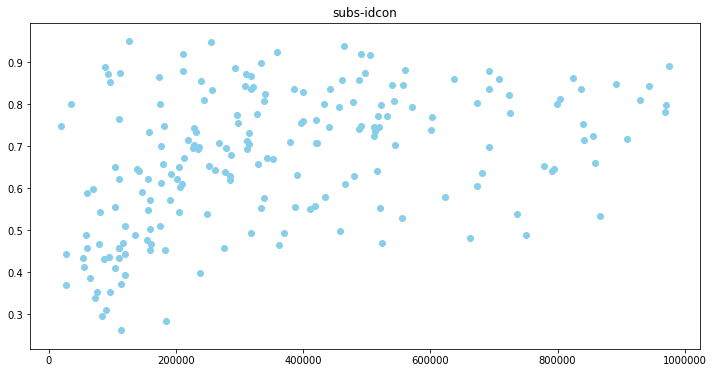

In [14]:
ax = df['subscriberCount']
ay = df['id_con']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='skyblue')
plt.title('subs-idcon')

Text(0.5, 1.0, 'Recent-View')

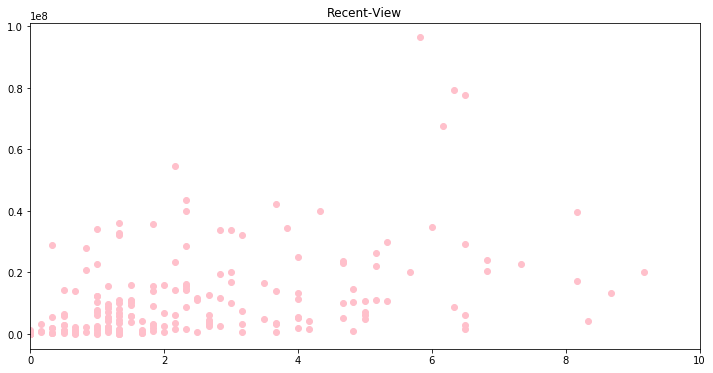

In [23]:
ax = df['recentFrequency']
ay = df['viewCount']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='pink')
plt.xlim(0, 10)
plt.title('Recent-View')

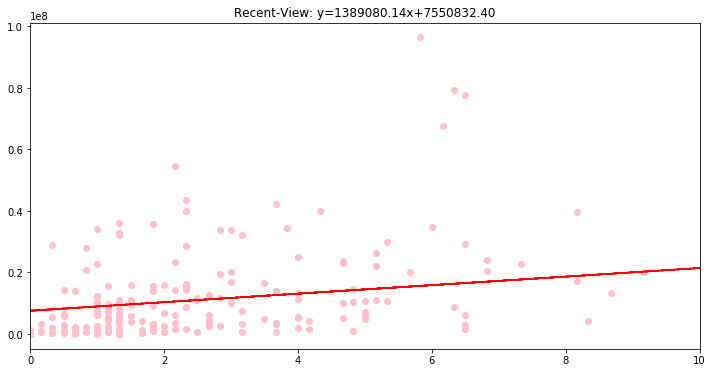

In [29]:
ax = df['recentFrequency']
ay = df['viewCount']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='pink')
plt.xlim(0, 10)
plt.title('Recent-View: y={0:.2f}x+{1:.2f}'.format(z[0], z[1]))

z = np.polyfit(ax, ay, 1)
p = np.poly1d(z)
plt.plot(ax, p(ax), 'r--')

Text(0.5, 1.0, 'id_con - viewcount')

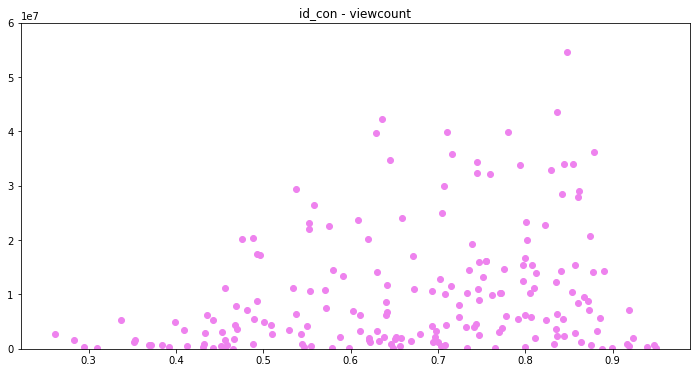

In [49]:
ax = df['id_con']
ay = df['viewCount']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='violet')

# Remove Outliers
plt.ylim(0, 60000000)


#Polyfit not working
# z = np.polyfit(ax, ay, 1)
# p = np.poly1d(z)
# plt.plot(ax, p(ax), 'r--')
# plt.title('idcon-View: y={0:.2f}x+{1:.2f}'.format(z[0], z[1]))

plt.title("id_con - viewcount")

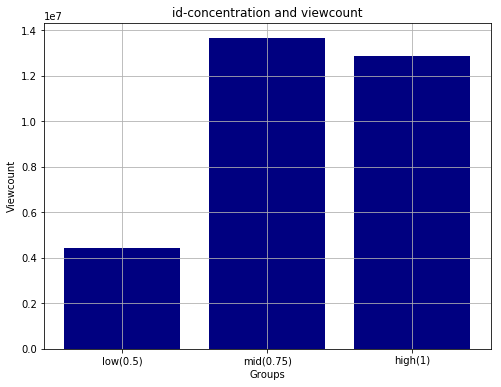

In [48]:
d1 = df[df['id_con']<=0.5]
d2 = df[(df['id_con']>0.5) & (df['id_con']<=0.75)]
d3 = df[df['id_con']>0.75]

l = [d1, d2, d3]
ind = ["low(0.5)", "mid(0.75)", "high(1)"]
val = [x['viewCount'].mean() for x in l]

plt.figure(figsize=(8,6))
plt.bar(ind, val, color='navy')
plt.title("id-concentration and viewcount")
plt.xlabel("Groups")
plt.ylabel("Viewcount")
plt.grid()

Text(0.5, 1.0, 'viewcount - id_con')

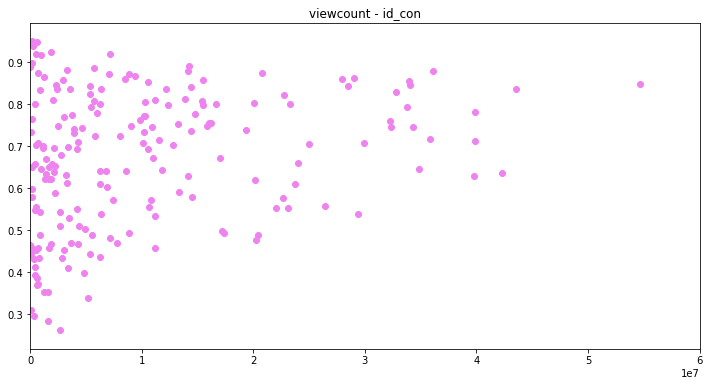

In [50]:
ax = df['viewCount']
ay = df['id_con']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='violet')

# Remove Outliers
plt.xlim(0, 60000000)


#Polyfit not working
# z = np.polyfit(ax, ay, 1)
# p = np.poly1d(z)
# plt.plot(ax, p(ax), 'r--')
# plt.title('idcon-View: y={0:.2f}x+{1:.2f}'.format(z[0], z[1]))

plt.title("viewcount - id_con")